In [20]:
import numpy as np
import cv2 as cv
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras import layers
from tensorflow.keras import models
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import confusion_matrix
from tensorflow.keras.models import load_model

Non Augmentation

In [21]:
df_path = "data/17Flowers/train"

idg = ImageDataGenerator(validation_split=0.2)

data_train = idg.flow_from_directory(
    df_path,
    subset="training",
    target_size=(224,224)
)

data_validation = idg.flow_from_directory(
    df_path,
    subset="validation",
    target_size=(224,224)
)

Found 823 images belonging to 17 classes.
Found 197 images belonging to 17 classes.


In [22]:
model = models.Sequential([
    #DeepLearning
    layers.Conv2D(64, (3, 3), strides=(2,2), activation='relu', padding="same", input_shape=(224, 224, 3)),
    layers.MaxPooling2D(),
    layers.Conv2D(128, (3, 3), strides=(1,1), activation='relu', padding="same"),
    layers.MaxPooling2D(),

    #MachineLearning
    layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(17, activation='softmax')
])

In [23]:
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

history = model.fit(data_train,
                    validation_data=data_validation,
                    epochs=40)

Epoch 1/40
26/26 [==============================] - 5s 182ms/step - loss: 146.1812 - accuracy: 0.0608 - val_loss: 2.8550 - val_accuracy: 0.0609
Epoch 2/40
26/26 [==============================] - 5s 180ms/step - loss: 2.4977 - accuracy: 0.2527 - val_loss: 2.8528 - val_accuracy: 0.1371
Epoch 3/40
26/26 [==============================] - 6s 221ms/step - loss: 1.4456 - accuracy: 0.5966 - val_loss: 3.0889 - val_accuracy: 0.1929
Epoch 4/40
26/26 [==============================] - 9s 362ms/step - loss: 0.7011 - accuracy: 0.8080 - val_loss: 3.9845 - val_accuracy: 0.1624
Epoch 5/40
26/26 [==============================] - 9s 359ms/step - loss: 0.4080 - accuracy: 0.9004 - val_loss: 5.1065 - val_accuracy: 0.2335
Epoch 6/40
26/26 [==============================] - 9s 362ms/step - loss: 0.2717 - accuracy: 0.9441 - val_loss: 5.1597 - val_accuracy: 0.2335
Epoch 7/40
26/26 [==============================] - 10s 366ms/step - loss: 0.1728 - accuracy: 0.9733 - val_loss: 5.5745 - val_accuracy: 0.2589
Epo

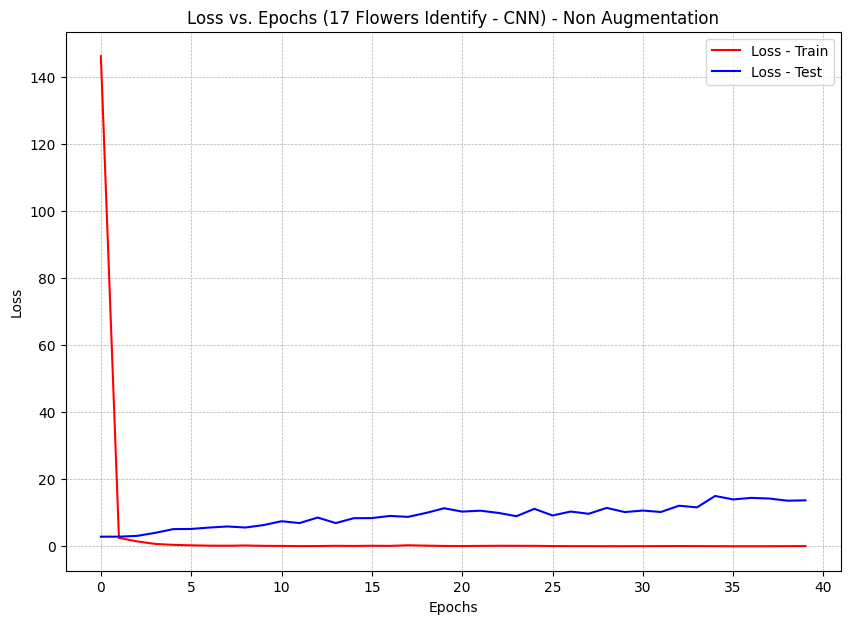

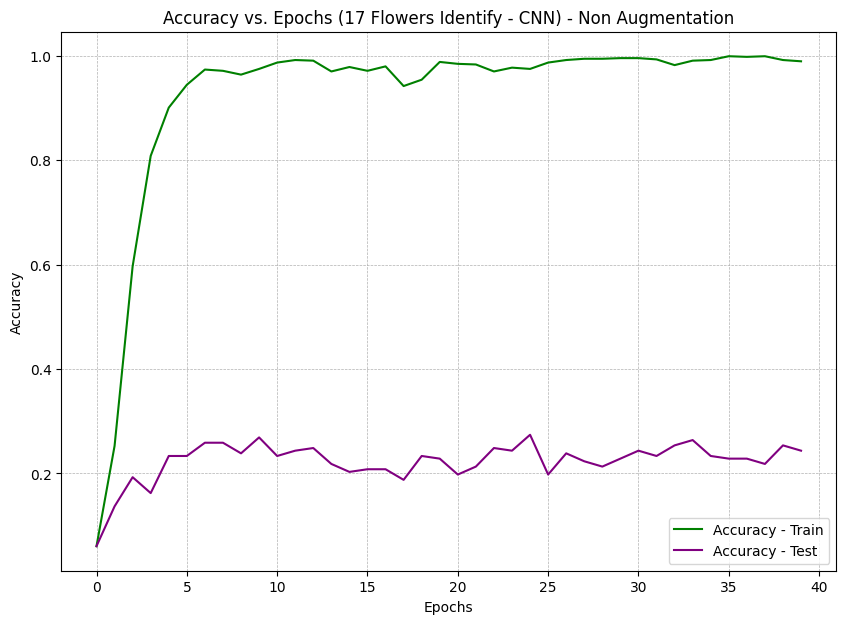

In [36]:
# Plot loss
plt.figure(figsize=(10, 7))
plt.plot(history.history['loss'], label='Loss - Train', color='red')
plt.plot(history.history['val_loss'], label='Loss - Test', color='blue')
plt.title('Loss vs. Epochs (17 Flowers Identify - CNN) - Non Augmentation')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.show()

# Plot accuracy
plt.figure(figsize=(10, 7))
plt.plot(history.history['accuracy'], label='Accuracy - Train', color='green')
plt.plot(history.history['val_accuracy'], label='Accuracy - Test', color='purple')
plt.title('Accuracy vs. Epochs (17 Flowers Identify - CNN) - Non Augmentation')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.show()

1/1 [==============================] - 0s 47ms/step


<Figure size 1600x1200 with 0 Axes>

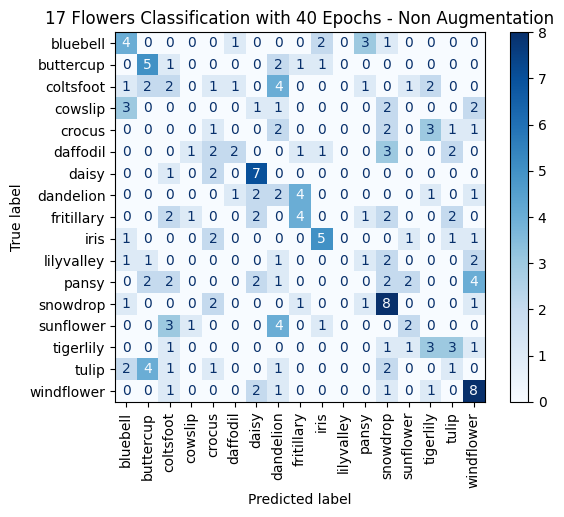

In [38]:
predicted_labels = []
actual_labels = []
plt.figure(figsize=(16, 12))
for i in range(data_validation.samples // data_validation.batch_size + 1):
    data_batch, labels_batch = data_validation.next()
    predictions = model.predict(data_batch)
    predicted_labels.extend(np.argmax(predictions, axis=1))
    actual_labels.extend(np.argmax(labels_batch, axis=1))

conf_matrix = confusion_matrix(actual_labels, predicted_labels)
display_labels = ['bluebell', 'buttercup', 'coltsfoot', 'cowslip', 'crocus', 'daffodil', 'daisy', 'dandelion',
                  'fritillary', 'iris', 'lilyvalley', 'pansy', 'snowdrop', 'sunflower', 'tigerlily', 'tulip', 'windflower']
display = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=display_labels)

display.plot(cmap=plt.cm.Blues, xticks_rotation='vertical')
plt.title(f'17 Flowers Classification with {len(history.epoch)} Epochs - Non Augmentation')
plt.show()

Augmentation

In [32]:
idg_A = ImageDataGenerator(
    rescale=1/255,
    rotation_range=20,
    zoom_range=0.2,
    horizontal_flip=True,
    validation_split=0.2
)

data_train_A = idg_A.flow_from_directory(
    df_path,
    shuffle=True,
    subset="training",
    target_size=(224,224)
)

data_validation_A = idg_A.flow_from_directory(
    df_path,
    shuffle=True,
    subset="validation",
    target_size=(224,224)
)

Found 823 images belonging to 17 classes.
Found 197 images belonging to 17 classes.


In [33]:
model_A = models.Sequential([
    #DeepLearning
    layers.Conv2D(64, (3, 3), strides=(2,2), activation='relu', padding="same", input_shape=(224, 224, 3)),
    layers.MaxPooling2D(),
    layers.Conv2D(128, (3, 3), strides=(1,1), activation='relu', padding="same"),
    layers.MaxPooling2D(),

    #MachineLearning
    layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(17, activation='softmax')
])

In [35]:
model_A.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

history_A = model_A.fit(data_train_A,
                    validation_data=data_validation_A,
                    epochs=40)

Epoch 1/40
26/26 [==============================] - 7s 271ms/step - loss: 2.4393 - accuracy: 0.2187 - val_loss: 169.3683 - val_accuracy: 0.2792
Epoch 2/40
26/26 [==============================] - 7s 273ms/step - loss: 1.9528 - accuracy: 0.3670 - val_loss: 160.8783 - val_accuracy: 0.4518
Epoch 3/40
26/26 [==============================] - 7s 269ms/step - loss: 1.5832 - accuracy: 0.4581 - val_loss: 171.7427 - val_accuracy: 0.5076
Epoch 4/40
26/26 [==============================] - 7s 269ms/step - loss: 1.4235 - accuracy: 0.5286 - val_loss: 141.5011 - val_accuracy: 0.5533
Epoch 5/40
26/26 [==============================] - 7s 271ms/step - loss: 1.3000 - accuracy: 0.5687 - val_loss: 184.8005 - val_accuracy: 0.5888
Epoch 6/40
26/26 [==============================] - 7s 273ms/step - loss: 1.1574 - accuracy: 0.6039 - val_loss: 161.1319 - val_accuracy: 0.5533
Epoch 7/40
26/26 [==============================] - 7s 272ms/step - loss: 1.0850 - accuracy: 0.6403 - val_loss: 175.7681 - val_accuracy:

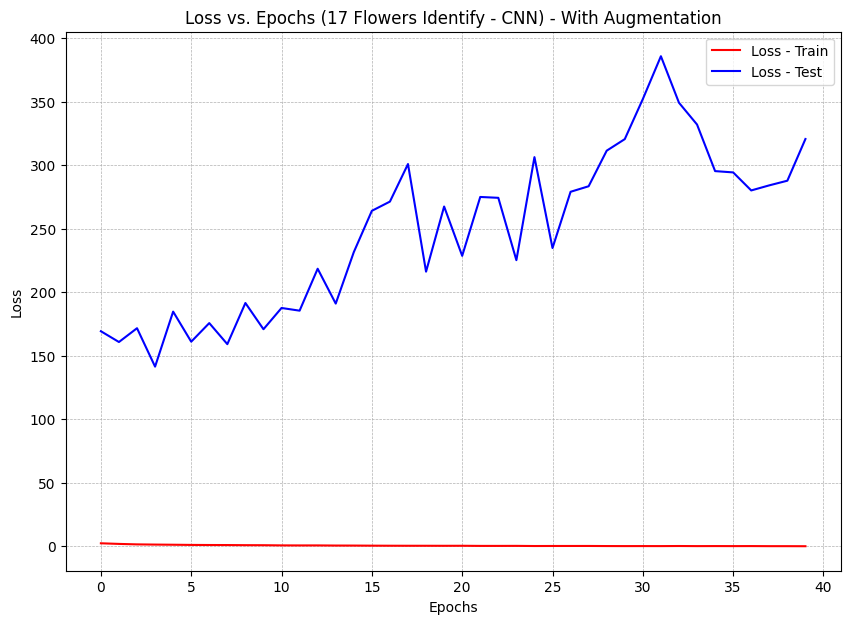

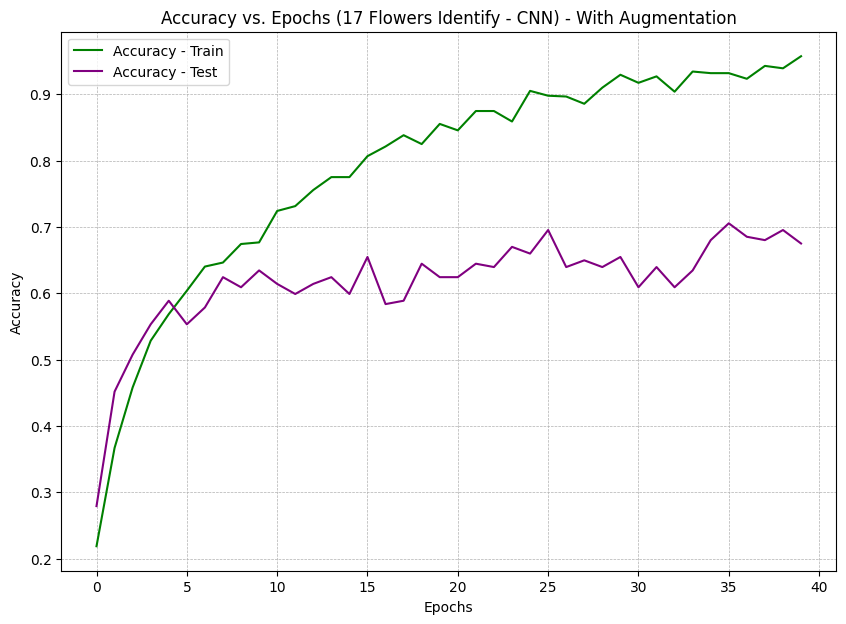

In [45]:
# Plot loss
plt.figure(figsize=(10, 7))
plt.plot(history_A.history['loss'], label='Loss - Train', color='red')
plt.plot(history_A.history['val_loss'], label='Loss - Test', color='blue')
plt.title('Loss vs. Epochs (17 Flowers Identify - CNN) - With Augmentation')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.show()

# Plot accuracy
plt.figure(figsize=(10, 7))
plt.plot(history_A.history['accuracy'], label='Accuracy - Train', color='green')
plt.plot(history_A.history['val_accuracy'], label='Accuracy - Test', color='purple')
plt.title('Accuracy vs. Epochs (17 Flowers Identify - CNN) - With Augmentation')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.show()

1/1 [==============================] - 0s 18ms/step


<Figure size 1600x1200 with 0 Axes>

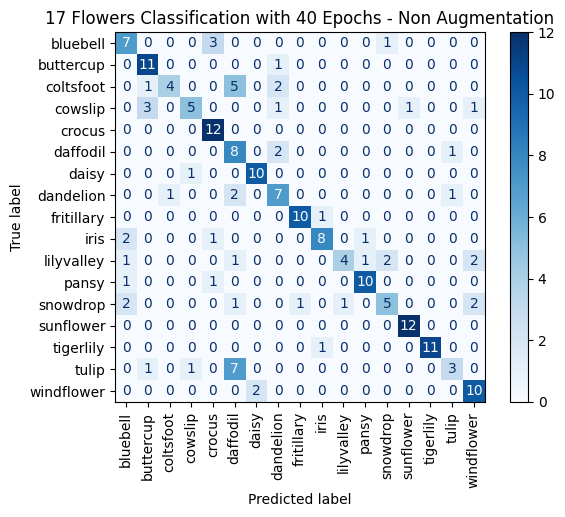

In [47]:
predicted_labels_A = []
actual_labels_A = []
plt.figure(figsize=(16, 12))
for i in range(data_validation_A.samples // data_validation_A.batch_size + 1):
    data_batch_A, labels_batch_A = data_validation_A.next()
    predictions_A = model_A.predict(data_batch_A)
    predicted_labels_A.extend(np.argmax(predictions_A, axis=1))
    actual_labels_A.extend(np.argmax(labels_batch_A, axis=1))

conf_matrix_A = confusion_matrix(actual_labels_A, predicted_labels_A)
display_labels = ['bluebell', 'buttercup', 'coltsfoot', 'cowslip', 'crocus', 'daffodil', 'daisy', 'dandelion',
                  'fritillary', 'iris', 'lilyvalley', 'pansy', 'snowdrop', 'sunflower', 'tigerlily', 'tulip', 'windflower']
display_A = ConfusionMatrixDisplay(confusion_matrix=conf_matrix_A, display_labels=display_labels)

display_A.plot(cmap=plt.cm.Blues, xticks_rotation='vertical')
plt.title(f'17 Flowers Classification with {len(history.epoch)} Epochs - Non Augmentation')
plt.show()

In [56]:
model_A.save('Results/save_model_flowers.h5')

In [58]:
test_path = 'data/17Flowers/test'
model = load_model('Results/save_model_flowers.h5')

In [59]:
test_datagen = ImageDataGenerator(rescale=1./255)

test_generator = test_datagen.flow_from_directory(
    test_path,
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical',
    shuffle=False
)

Found 340 images belonging to 17 classes.


In [60]:
test_loss, test_accuracy = model.evaluate(test_generator)
print(f"Test Loss: {test_loss}")
print(f"Test Accuracy: {test_accuracy}")

11/11 [==============================] - 1s 59ms/step - loss: 1.5714 - accuracy: 0.6853
Test Loss: 1.5714303255081177
Test Accuracy: 0.6852940917015076


Telegram Bot

In [70]:
import telebot
from telebot import types
import random
from datetime import datetime
import jdatetime as jdate
from gtts import gTTS
import qrcode
import io
from PIL import Image

class_names = ['bluebell', 'buttercup', 'coltsfoot', 'cowslip', 'crocus', 
               'daffodil', 'daisy', 'dandelion', 'fritillary', 'iris', 
               'lilyvalley', 'pansy', 'snowdrop', 'sunflower', 'tigerlily', 
               'tulip', 'windflower']

TOKEN = "6828266728:AAFrCjDbkxbxqt8HRYWC4Aii4wSMPurUxJ8"
bot = telebot.TeleBot(TOKEN, parse_mode=None)

model = tf.keras.models.load_model('Results\save_model_flowers.h5')

user_states = {}

keyboard = types.ReplyKeyboardMarkup(row_width=3, resize_keyboard=True)
key_1 = types.KeyboardButton("Start ✅")
key_2 = types.KeyboardButton("Game 🎲")
key_3 = types.KeyboardButton("Age 🕵️‍♂️")
key_4 = types.KeyboardButton("Voice 🔊")
key_5 = types.KeyboardButton("Max 🥇")
key_6 = types.KeyboardButton("Argmax 🎖")
key_7 = types.KeyboardButton("QrCode 🖨")
key_8 = types.KeyboardButton("Photo 📸")
key_9 = types.KeyboardButton("Help 🎈")
key_10 = types.KeyboardButton("Classify Image 🖼️")  # New button for image classification
keyboard.add(key_1, key_2, key_3, key_4, key_5, key_6, key_7, key_8, key_9, key_10)

@bot.message_handler(commands=['start'])
def send_welcome(message):
    bot.send_message(message.chat.id, f"Hello {message.from_user.first_name}, welcome to your friendly BOT😍😎, Please select your request from the menu", reply_markup=keyboard)

@bot.message_handler(func=lambda message: message.text == "Classify Image 🖼️")
def prompt_for_image(message):
    bot.send_message(message.chat.id, "Please send me an image to classify.")

@bot.message_handler(content_types=['photo'])
def handle_photo(message):
    file_info = bot.get_file(message.photo[-1].file_id)
    downloaded_file = bot.download_file(file_info.file_path)

    image_stream = io.BytesIO(downloaded_file)
    image = Image.open(image_stream).convert('RGB')
    image = image.resize((224, 224))
    img_array = np.expand_dims(np.array(image) / 255.0, axis=0)

    predictions = model.predict(img_array)
    predicted_index = np.argmax(predictions, axis=1)[0]  
    predicted_class_name = class_names[predicted_index]  

    bot.send_message(message.chat.id, f"Predicted class: {predicted_class_name}")


@bot.message_handler(func=lambda message: message.text == "Start ✅")
def start_message(message):
    bot.send_message(message.chat.id, f"Hi {message.from_user.first_name}😎, Please select your request from the menu", reply_markup=keyboard)

@bot.message_handler(commands=['game'])
@bot.message_handler(func=lambda message: message.text == "Game 🎲")
def handle_game_start(message):
    start_game(message.chat.id)

@bot.message_handler(func=lambda message: message.chat.id in user_states and "game" in user_states[message.chat.id] and user_states[message.chat.id]["game"]['playing'])
def handle_guess(message):
    chat_id = message.chat.id
    game_state = user_states[chat_id]["game"]
    guess = int(message.text) if message.text.isdigit() else None
    if guess is None:
        bot.send_message(chat_id, "Please enter a valid number.")
        return

    game_state['guesses'] += 1

    if guess == game_state['number']:
        bot.send_message(chat_id, f"Well done, it is true👏, The random number was: {game_state['number']}, and your all steps to find it is: {game_state['guesses']}")
        game_state['playing'] = False
        bot.send_message(chat_id, "Select an option from the menu or start a new game.", reply_markup=keyboard)
    elif guess < game_state['number']:
        bot.send_message(chat_id, "Go up 🔼")
    else:
        bot.send_message(chat_id, "Go down 🔽")

@bot.message_handler(commands=['age'])
@bot.message_handler(func=lambda message: message.text == "Age 🕵️‍♂️")
def ask_for_birthdate(message):
    bot.send_message(message.chat.id, "Please enter your birthdate in Shamsi (Hijri Shamsi) format as: (YYYY/MM/DD).")

@bot.message_handler(func=lambda message: "/" in message.text and len(message.text.split("/")) == 3)
def calculate_age(message):
    birthdate = message.text.split("/")
    birthdate = jdate.date(int(birthdate[0]), int(birthdate[1]), int(birthdate[2]))
    today = jdate.date.today()
    age = today.year - birthdate.year - ((today.month, today.day) < (birthdate.month, birthdate.day))
    bot.send_message(message.chat.id, f"You are {age} years old.")

@bot.message_handler(commands=['voice'])
@bot.message_handler(func=lambda message: message.text == "Voice 🔊")
def ask_for_text(message):
    bot.send_message(message.chat.id, "Please send me a sentence in English to convert to voice, format as: (v: My text).")

@bot.message_handler(func=lambda message: "v:" in message.text)
def text_to_voice(message):
    text_to_convert = message.text.replace('v:', '').strip()
    tts = gTTS(text_to_convert, lang='en')
    voice = io.BytesIO()
    tts.write_to_fp(voice)
    voice.seek(0)
    bot.send_voice(message.chat.id, voice)

@bot.message_handler(commands=['max', "argmax"])
@bot.message_handler(func=lambda message: message.text == "Max 🥇" or message.text == "Argmax 🎖")
def ask_for_array(message):
    user_states[message.chat.id] = {"command": message.text}
    bot.send_message(message.chat.id, "Please enter a list of numbers separated by commas, format as: (1,2,3,...).")

@bot.message_handler(func=lambda message: "," in message.text and message.chat.id in user_states)
def handle_array_commands(message):
    command = user_states[message.chat.id].get("command")
    numbers = [int(n) for n in message.text.split(',') if n.isdigit()]
    if command == "Max 🥇" or command == "/max":
        max_value = max(numbers)
        bot.send_message(message.chat.id, f"The maximum number is: {max_value}")
    elif command == "Argmax 🎖" or command == "/argmax":
        max_index = numbers.index(max(numbers))
        bot.send_message(message.chat.id, f"The index of the maximum number is: {max_index + 1}")

    if message.chat.id in user_states:
        del user_states[message.chat.id]

@bot.message_handler(commands=['qrcode'])
@bot.message_handler(func=lambda message: message.text == "QrCode 🖨")
def ask_for_qr_data(message):
    bot.send_message(message.chat.id, "Please send me the data you want to encode in a QR code, format as: (qr: My request).")

@bot.message_handler(func=lambda message: "qr:" in message.text)
def generate_qr_code(message):
    data_for_qr = message.text.replace('qr:', '').strip()
    qr = qrcode.make(data_for_qr)
    img = io.BytesIO()
    qr.save(img, 'PNG')
    img.seek(0)
    bot.send_photo(message.chat.id, img)

@bot.message_handler(commands=['help'])
@bot.message_handler(func=lambda message: message.text == "Help 🎈")
def show_help(message):
    help_text = """
    /start - Greet with the user's name
    /game - Start a number guessing game
    /age - Calculate your age based on Shamsi (Hijri Shamsi) calendar
    /voice - Convert a sentence in English to voice
    /max - Find the maximum number in a list
    /argmax - Find the index of the maximum number in a list
    /qrcode - Generate a QR code from the input text
    /photo - Send a random photo from a predefined set
    /help - Show this help message
    /classify - Classify an image
    """
    bot.send_message(message.chat.id, help_text)

bot.infinity_polling()

1/1 [==============================] - 0s 52ms/step


2025-01-26 20:36:53,683 (__init__.py:1121 MainThread) ERROR - TeleBot: "Infinity polling: polling exited"
2025-01-26 20:36:53,684 (__init__.py:1123 MainThread) ERROR - TeleBot: "Break infinity polling"


Test

In [72]:
model = load_model('Results\save_model_flowers.h5')

image_path = 'Test_data\image_1203.jpg'
image = cv.imread(image_path)
image = cv.cvtColor(image, cv.COLOR_BGR2RGB)
image = cv.resize(image, (224, 224))
image = image / 255.0
image = np.expand_dims(image, axis=0)
prediction = model.predict(image)
predicted_class_index = np.argmax(prediction)

predicted_flower = display_labels[predicted_class_index]
print(f"The predicted flower is: {predicted_flower}")

1/1 [==============================] - 0s 32ms/step
The predicted flower is: windflower


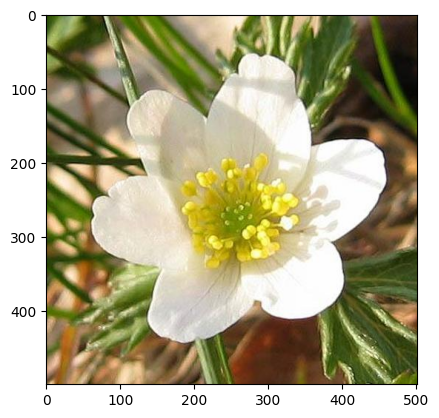

In [75]:
img_A = cv.imread("Test_data\image_1203.jpg")
plt.imshow(cv.cvtColor(img_A, cv.COLOR_BGR2RGB))
plt.show()